In [112]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = 'https://github.com/karthi-1212/PRODIGY_DS_02/raw/main/Titanic_Dataset(Train).csv'
data_set = pd.read_csv(url)
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data_set.shape

(891, 12)

In [35]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data_set.isnull().sum()
#Observation & Inference:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
data_set.drop(columns="Cabin",axis=1,inplace=True)

In [39]:
data_set['Age'].fillna(data_set['Age'].mean(),inplace=True)

In [42]:
data_set['Embarked'].fillna(data_set['Embarked'].mode()[0],inplace=True)

In [44]:
data_set.isnull().sum().sum()

0

In [47]:
data_set.duplicated().sum()

0

In [55]:
data_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

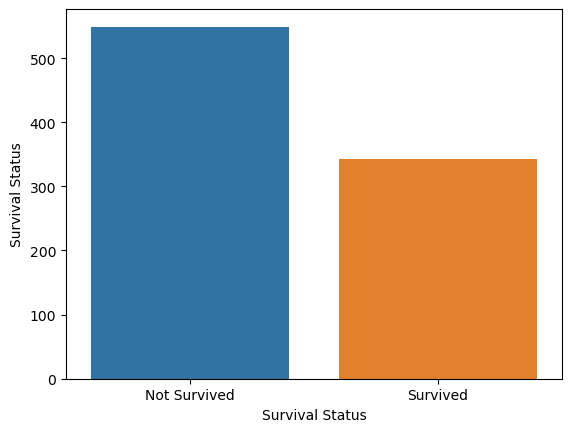

In [61]:
sns.countplot(x='Survived', data=data_set)
plt.xlabel("Survival Status");plt.ylabel("Survival Status")
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

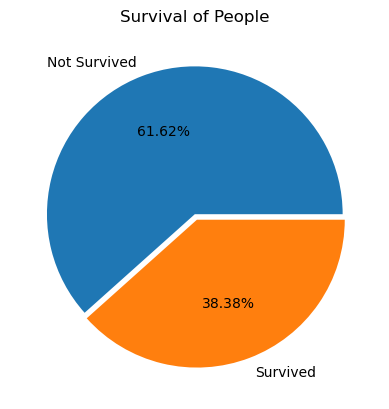

In [64]:
plt.pie(data_set['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not Survived','Survived'])
plt.title("Survival of People")
plt.show()

In [66]:
data_set['Sex'].unique()

array(['male', 'female'], dtype=object)

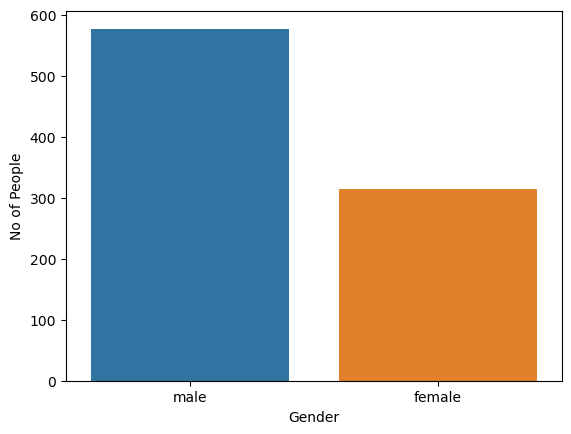

In [70]:
sns.countplot(x='Sex', data=data_set)
plt.xlabel("Gender");plt.ylabel("No of People")
plt.show()

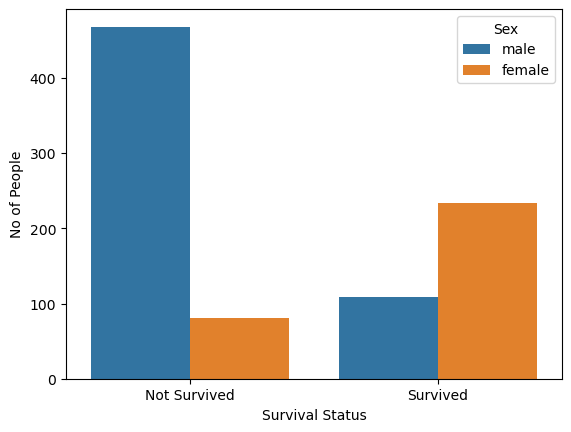

In [69]:
sns.countplot(x='Survived',hue='Sex', data=data_set)
plt.xlabel("Survival Status");plt.ylabel("No of People")
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

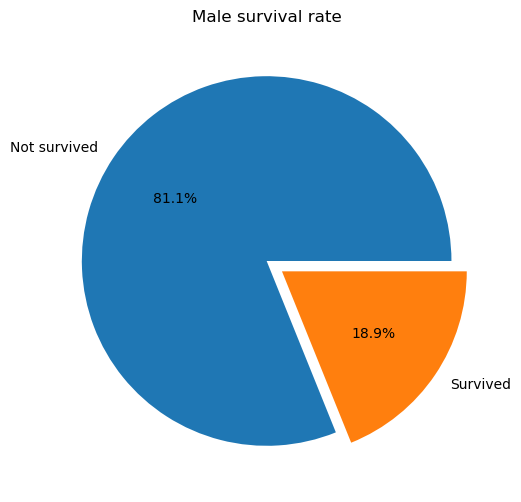

In [78]:
data_set[data_set['Sex'] == 'male'].Survived.groupby(data_set.Survived).count().plot(kind='pie', figsize=(8, 6), explode=[0, 0.1], autopct='%1.1f%%', labels=['Not survived', 'Survived'])
plt.ylabel('')
plt.title('Male survival rate')
plt.show()


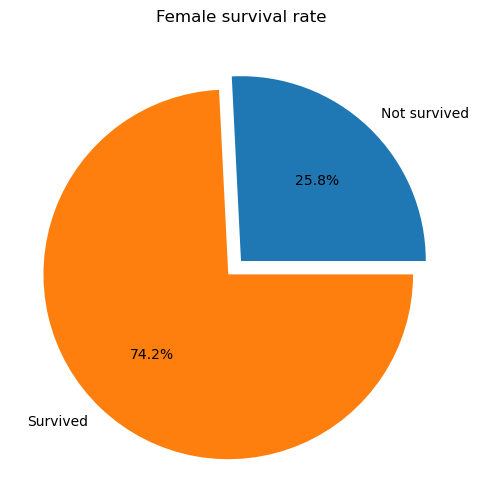

In [79]:
data_set[data_set['Sex'] == 'female'].Survived.groupby(data_set.Survived).count().plot(kind='pie', figsize=(8, 6), explode=[0, 0.1], autopct='%1.1f%%', labels=['Not survived', 'Survived'])
plt.ylabel('')
plt.title('Female survival rate')
plt.show()

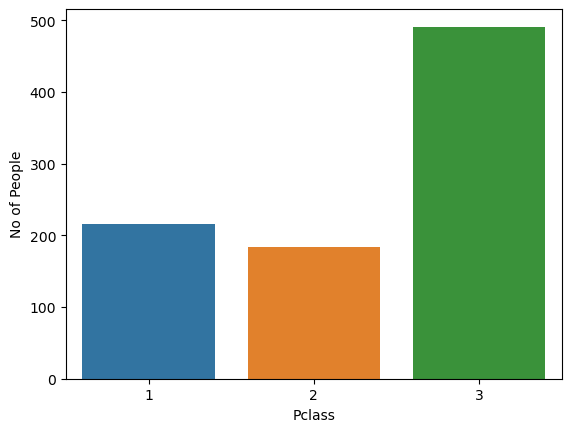

In [80]:
sns.countplot(x='Pclass', data=data_set)
plt.xlabel("Pclass");plt.ylabel("No of People")
plt.show()

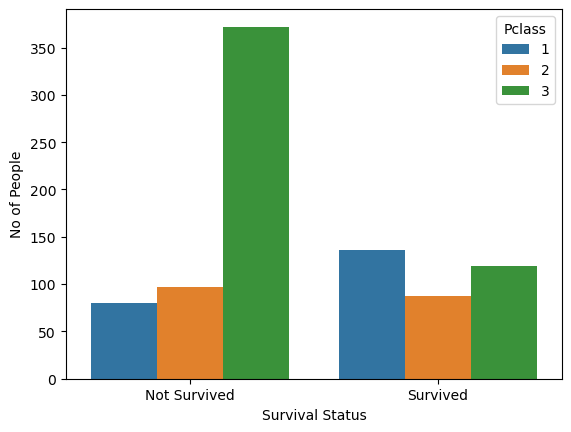

In [82]:
sns.countplot(x='Survived',hue="Pclass", data=data_set)
plt.xlabel("Survival Status");plt.ylabel("No of People")
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

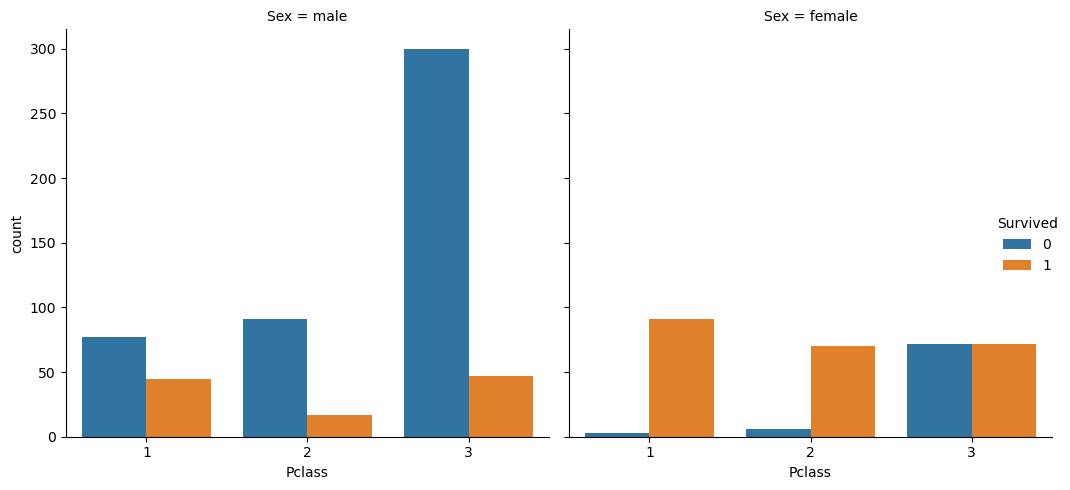

In [84]:
sns.catplot(x='Pclass',hue="Survived", col='Sex',kind='count',data=data_set)
plt.tight_layout()

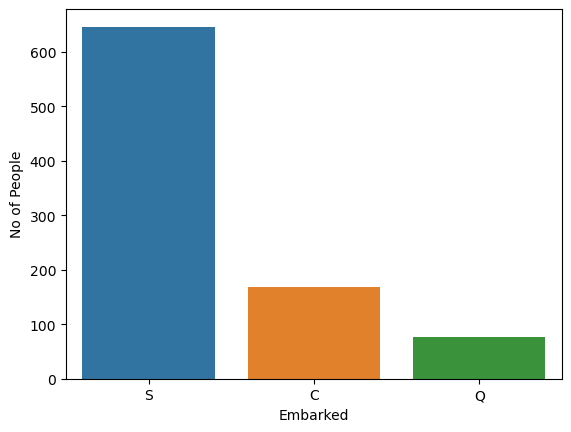

In [85]:
sns.countplot(x='Embarked', data=data_set)
plt.xlabel("Embarked");plt.ylabel("No of People")
plt.show()

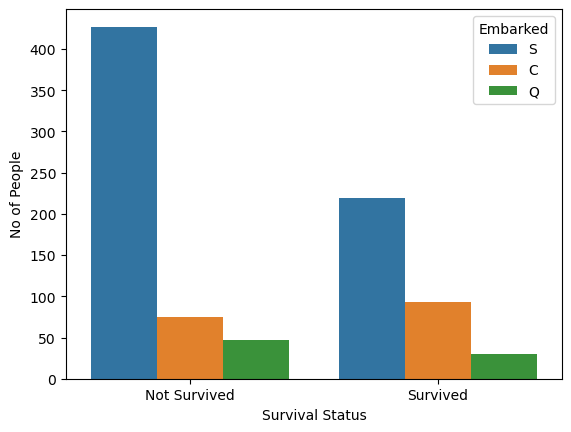

In [86]:
sns.countplot(x='Survived',hue="Embarked", data=data_set)
plt.xlabel("Survival Status");plt.ylabel("No of People")
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.show()

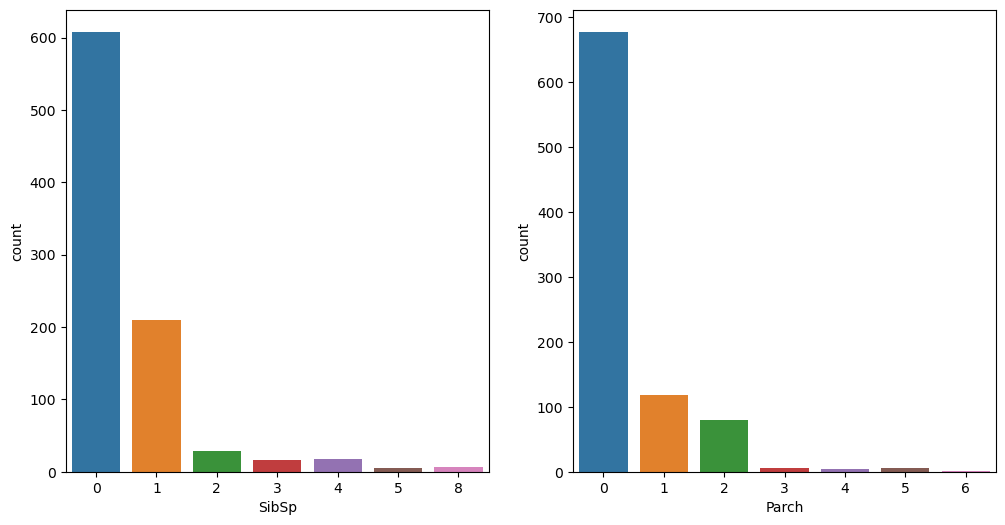

In [90]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x="SibSp",data=data_set,ax=axis[0])
sns.countplot(x="Parch",data=data_set,ax=axis[1])
plt.show()

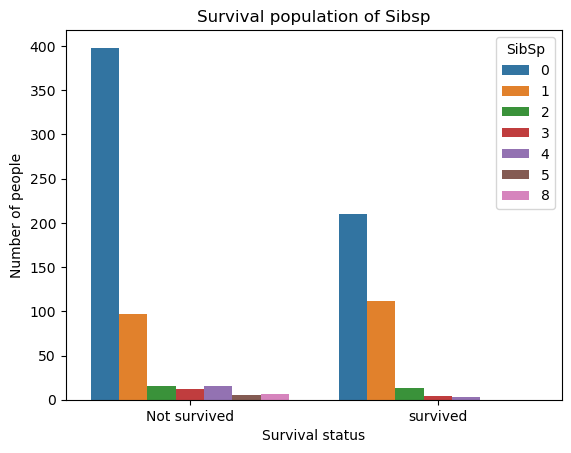

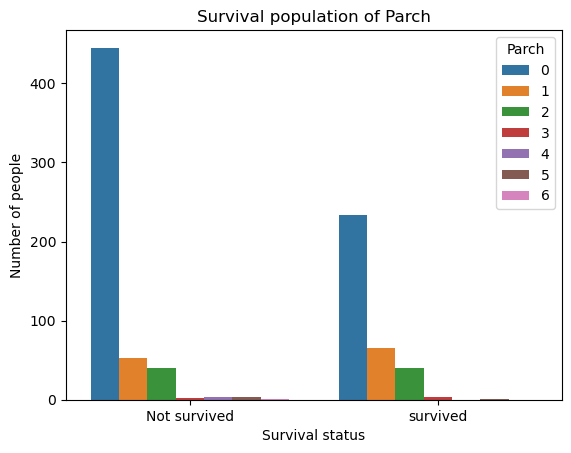

In [92]:
sns.countplot(x = 'Survived', hue='SibSp', data=data_set)
plt.xticks (ticks=[0,1], labels=['Not survived', 'survived'])

plt.xlabel("Survival status")
plt.ylabel("Number of people")

plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x = 'Survived', hue='Parch', data=data_set)
plt.xticks (ticks=[0,1], labels=['Not survived', 'survived'])

plt.title("Survival population of Parch")
plt.xlabel("Survival status")

plt.ylabel("Number of people")
plt.show()


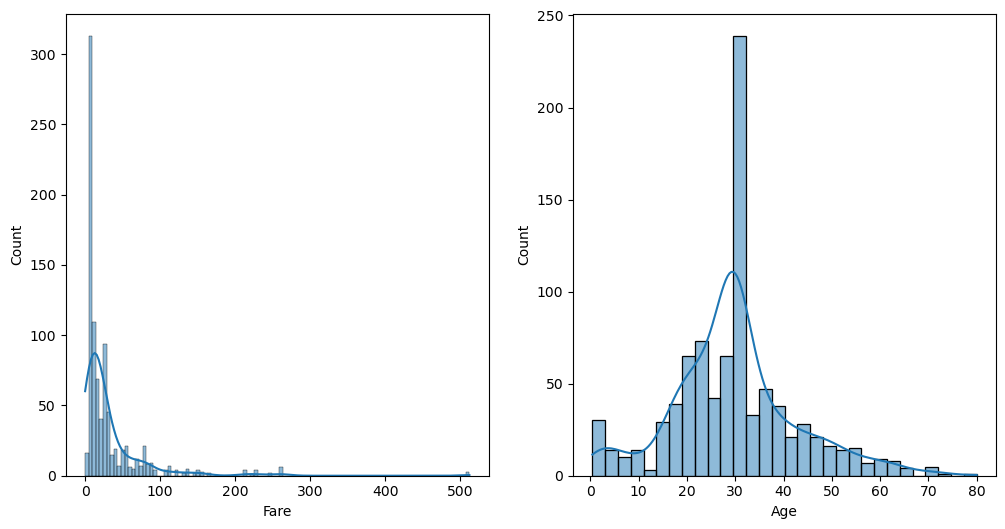

In [94]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.histplot(data_set['Fare'],kde=True,ax=axis[0])
sns.histplot(data_set['Age'].dropna(),kde=True,ax=axis[1])
plt.show()


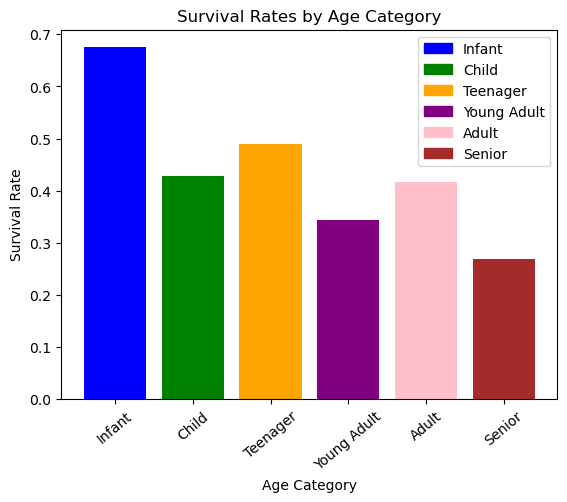

In [95]:
# Define cut points and label names
cut_points = [0, 5, 12, 18, 35, 60, 100]

label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
data_set['Age_categories'] = pd.cut(data_set['Age'], bins=cut_points, labels=label_names, right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = data_set.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle ((0, 0), 1, 1, color=colors[i]) for i in range (len(colors))]
ax.legend (handles, label_names)

ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')

ax.set_ylabel('Survival Rate')
plt.xticks (rotation=40)

plt.show()


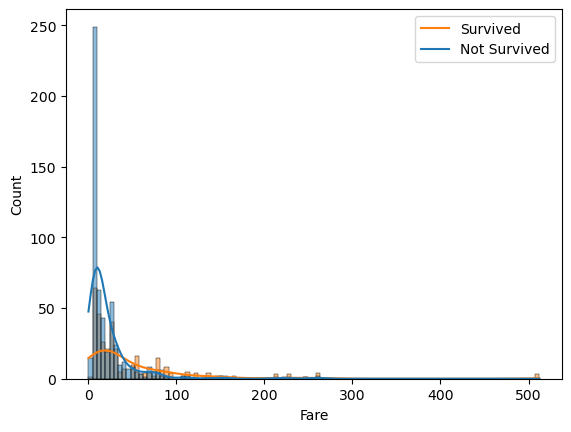

In [99]:
sns.histplot(x='Fare',hue='Survived',data=data_set,kde=True)
plt.legend(labels=['Survived','Not Survived'])
plt.show()

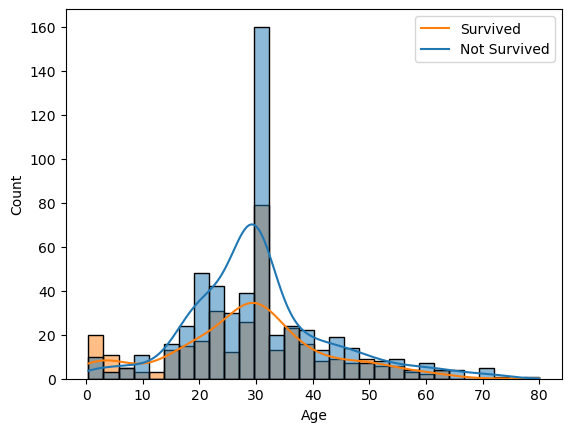

In [101]:
sns.histplot(x='Age',hue='Survived',data=data_set,kde=True)
plt.legend(labels=['Survived','Not Survived'])
plt.show()

In [108]:
data_set.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data_set['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

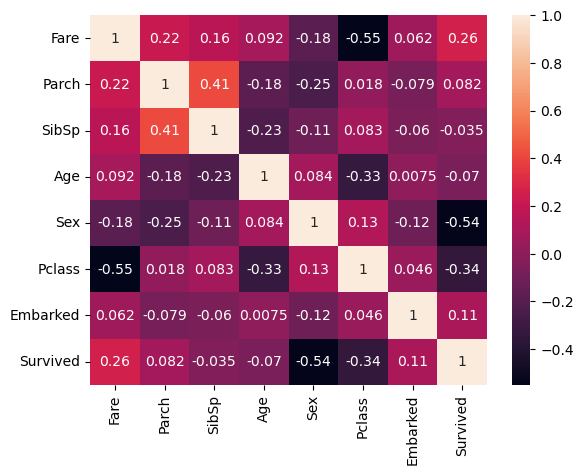

In [111]:
Df_num=data_set[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
sns.heatmap(Df_num.corr(),annot=True)
plt.show()